In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as plta
import matplotlib.ticker as ticker

import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error as MSE

plt.style.use('seaborn')

In [101]:
df = pd.read_csv (r'C:\אריאל\שנה א\סמסטר א\מבוא למדעי הנתונים\עבודת הגמר\Data_Science_intro_project\Classification\dataclassification_converted_to_english.csv', index_col = False)

In [102]:
df.head()

,product_name,code,category_name,Vitamin_B1,Vitamin_B6,Dietary_fiber,Folic_acid,energy,Proteins,Carbohydrates,...,K_Potassium,humidity,chromium,Molybdenum,Unsaturated,Acidic_acid,Linoleic_acid,DHA,EPA,Chlorophyll
0,clementine,P_964560,fruits,0.09,0.08,1.7,24.0,47.0,9.0,12.0,...,0,0,0,0,0,0,0,0,0,0.0
1,Gilded_apple,P_963136,fruits,0.00,0.00,2.4,0.0,52.0,0.3,13.8,...,0,0,0,0,0,0,0,0,0,0.0
2,lemon,P_964492,fruits,0.00,0.08,2.8,0.0,29.0,1.1,9.3,...,0,0,0,0,0,0,0,0,0,0.0
3,Orange_in_the_juice_network,P_964348,fruits,0.09,0.06,2.5,39.0,49.0,1.0,11.9,...,0,0,0,0,0,0,0,0,0,0.0
4,Avocado,P_964980,fruits,0.07,0.30,6.7,81.0,160.0,2.0,8.5,...,0,0,0,0,0,0,0,0,0,0.0


In [103]:
df.replace('(^\s+|\s+$)', '', regex=True, inplace=True)
df = df.set_index(['code'])
df

,product_name,category_name,Vitamin_B1,Vitamin_B6,Dietary_fiber,Folic_acid,energy,Proteins,Carbohydrates,Fats,...,K_Potassium,humidity,chromium,Molybdenum,Unsaturated,Acidic_acid,Linoleic_acid,DHA,EPA,Chlorophyll
code,,,,,,,,,,,,,,,,,,,,,
P_964560,clementine,fruits,0.09,0.08,1.7,24.0,47.0,9.0,12.0,0.2,...,0,0,0,0,0,0,0,0,0,0.0
P_963136,Gilded_apple,fruits,0.00,0.00,2.4,0.0,52.0,0.3,13.8,0.2,...,0,0,0,0,0,0,0,0,0,0.0
P_964492,lemon,fruits,0.00,0.08,2.8,0.0,29.0,1.1,9.3,0.3,...,0,0,0,0,0,0,0,0,0,0.0
P_964348,Orange_in_the_juice_network,fruits,0.09,0.06,2.5,39.0,49.0,1.0,11.9,0.3,...,0,0,0,0,0,0,0,0,0,0.0
P_964980,Avocado,fruits,0.07,0.30,6.7,81.0,160.0,2.0,8.5,14.7,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_7290018043509,Av._Whey_Protein_T._Vanilla,Vitamins_and_supplements,0.00,0.50,0.0,189.7,137.0,26.0,2.8,2.6,...,0,0,0,0,0,0,0,0,0,0.0
P_7290018043523,Av._Chocolate_whey_protein,Vitamins_and_supplements,0.00,0.49,0.0,186.6,134.0,25.0,2.6,2.6,...,0,0,0,0,0,0,0,0,0,0.0
P_7290110327590,Protein_powder_Go_taste,Vitamins_and_supplements,0.00,0.00,0.8,0.0,125.0,25.0,2.8,1.2,...,0,0,0,0,0,0,0,0,0,0.0


In [104]:
df.drop_duplicates()

,product_name,category_name,Vitamin_B1,Vitamin_B6,Dietary_fiber,Folic_acid,energy,Proteins,Carbohydrates,Fats,...,K_Potassium,humidity,chromium,Molybdenum,Unsaturated,Acidic_acid,Linoleic_acid,DHA,EPA,Chlorophyll
code,,,,,,,,,,,,,,,,,,,,,
P_964560,clementine,fruits,0.09,0.08,1.7,24.0,47.0,9.0,12.0,0.2,...,0,0,0,0,0,0,0,0,0,0.0
P_963136,Gilded_apple,fruits,0.00,0.00,2.4,0.0,52.0,0.3,13.8,0.2,...,0,0,0,0,0,0,0,0,0,0.0
P_964492,lemon,fruits,0.00,0.08,2.8,0.0,29.0,1.1,9.3,0.3,...,0,0,0,0,0,0,0,0,0,0.0
P_964348,Orange_in_the_juice_network,fruits,0.09,0.06,2.5,39.0,49.0,1.0,11.9,0.3,...,0,0,0,0,0,0,0,0,0,0.0
P_964980,Avocado,fruits,0.07,0.30,6.7,81.0,160.0,2.0,8.5,14.7,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_7290018043509,Av._Whey_Protein_T._Vanilla,Vitamins_and_supplements,0.00,0.50,0.0,189.7,137.0,26.0,2.8,2.6,...,0,0,0,0,0,0,0,0,0,0.0
P_7290018043523,Av._Chocolate_whey_protein,Vitamins_and_supplements,0.00,0.49,0.0,186.6,134.0,25.0,2.6,2.6,...,0,0,0,0,0,0,0,0,0,0.0
P_7290110327590,Protein_powder_Go_taste,Vitamins_and_supplements,0.00,0.00,0.8,0.0,125.0,25.0,2.8,1.2,...,0,0,0,0,0,0,0,0,0,0.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9581 entries, P_964560 to P_7290110327606
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   product_name                         9581 non-null   object 
 1   category_name                        9581 non-null   object 
 2   Vitamin_B1                           9581 non-null   float64
 3   Vitamin_B6                           9581 non-null   float64
 4   Dietary_fiber                        9581 non-null   float64
 5   Folic_acid                           9581 non-null   float64
 6   energy                               9580 non-null   float64
 7   Proteins                             9580 non-null   float64
 8   Carbohydrates                        9566 non-null   float64
 9   Fats                                 9581 non-null   object 
 10  sodium                               9581 non-null   float64
 11  Vitamin_B3       

In [106]:
df = df.set_index(['product_name'])
df

,category_name,Vitamin_B1,Vitamin_B6,Dietary_fiber,Folic_acid,energy,Proteins,Carbohydrates,Fats,sodium,...,K_Potassium,humidity,chromium,Molybdenum,Unsaturated,Acidic_acid,Linoleic_acid,DHA,EPA,Chlorophyll
product_name,,,,,,,,,,,,,,,,,,,,,
clementine,fruits,0.09,0.08,1.7,24.0,47.0,9.0,12.0,0.2,1.0,...,0,0,0,0,0,0,0,0,0,0.0
Gilded_apple,fruits,0.00,0.00,2.4,0.0,52.0,0.3,13.8,0.2,1.0,...,0,0,0,0,0,0,0,0,0,0.0
lemon,fruits,0.00,0.08,2.8,0.0,29.0,1.1,9.3,0.3,2.0,...,0,0,0,0,0,0,0,0,0,0.0
Orange_in_the_juice_network,fruits,0.09,0.06,2.5,39.0,49.0,1.0,11.9,0.3,0.0,...,0,0,0,0,0,0,0,0,0,0.0
Avocado,fruits,0.07,0.30,6.7,81.0,160.0,2.0,8.5,14.7,7.0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Av._Whey_Protein_T._Vanilla,Vitamins_and_supplements,0.00,0.50,0.0,189.7,137.0,26.0,2.8,2.6,64.0,...,0,0,0,0,0,0,0,0,0,0.0
Av._Chocolate_whey_protein,Vitamins_and_supplements,0.00,0.49,0.0,186.6,134.0,25.0,2.6,2.6,133.0,...,0,0,0,0,0,0,0,0,0,0.0
Protein_powder_Go_taste,Vitamins_and_supplements,0.00,0.00,0.8,0.0,125.0,25.0,2.8,1.2,86.0,...,0,0,0,0,0,0,0,0,0,0.0


In [107]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)
prod = train_set.copy()

In [108]:
products = prod.drop("category_name", axis=1)
category_not_encoded = prod["category_name"].copy()

In [109]:
for col in products.columns:  
    products[col] = pd.to_numeric(products[col], errors='coerce')
products = products.fillna(0)
sts_dropped_collumns = np.transpose(products.loc[:, (products == 0).all(axis=0)]).index
products = products.loc[:, (products != 0).any(axis=0)]

In [110]:
sts_dropped_collumns

Index(['DHA_+_EPA', 'From_sugars_to_organic_acids', 'wetness', 'ash',
       'Linoleic_fatty_acid', 'Alpha_linolenic_acid', 'humidity', 'chromium',
       'Chlorophyll'],
      dtype='object')

In [111]:
#in order to reduce background noise, we decided to drop the columns in which there are less than 10 products_notscaleducts with this feature
products = products.reset_index()
arr = np.array([])
col_droped = np.array([])
for col in products.columns:
    if products[col].astype(bool).sum(axis=0)<20: 
        arr = np.append(arr, products[col].to_numpy().nonzero())
        col_droped = np.append(col_droped, col)
print(col_droped)
arr = set(arr) #all number of rows without duplicates
for i in arr:
    products = products.drop(i)
products = products.drop(col_droped, axis=1) #deletes all columns with all values set to zero
products = products.set_index(['product_name'])

['Polyunsaturated_fat' 'Proteins_(Albumin_|_Casein_40_|_60)'
 'From_the_carbohydrates_lactose' 'Vitamin_D_Calciprolol'
 '3_omega_fatty_acids' 'Niacin' 'Vitamin_B5' 'Pantothenic_acid'
 'Saturated_fat' 'Trans_fat' 'Nicotinamide' 'Non-fibrous_fibers'
 'Of_which_unsaturated_fat' '6_omega_fatty_acids' 'Salt' 'manganese'
 'Soluble_fiber' 'Acetic_acid' 'Ascorbic_acid' 'Inositol' 'Carnitine'
 'Chloride' 'AA_fatty_acid' 'Vitamin_B3_Nicotinamide_Equilibrium'
 'K_Potassium' 'Molybdenum' 'Unsaturated' 'Acidic_acid' 'Linoleic_acid'
 'DHA' 'EPA']


In [112]:
category_not_encoded = category_not_encoded.reset_index()
for i in arr:
    category_not_encoded = category_not_encoded.drop(i)
category_not_encoded = category_not_encoded.set_index(['product_name'])   

In [113]:
print (category_not_encoded.value_counts())

category_name                     
Baking_and_canning_cooking            1533
snacks                                1452
Milk_and_eggs                         1036
Refrigerated_food                      939
Cooking_and_baking_products            280
For_those_who_avoid_gluten             256
Cooking                                232
bread                                  195
Health_in_the_refrigerator             188
From_the_freezer                       182
Refrigerator_products_and_eggs         178
Gluten_free                            162
Vitamins_and_supplements               134
Cereals                                121
Diet_and_sugar_free                    102
Pastries_and_cakes_from_the_bakery      85
For_baby_-_food                         83
vegetables                              79
Without_added_sugar                     64
Nuts_and_dried_fruits                   62
Babies_and_children                     48
Breads                                  31
Organic_fruits_and_

from looking at the categories, we infered few things:

we need to unite the following categories:

Baking_and_canning_cooking, Cooking_and_baking_products, Cooking --> Baking and Cooking

Milk_and_eggs, Refrigerated_food, Refrigerator_products_and_eggs, Health_in_the_refrigerator --> Refrigerated_food

For_those_who_avoid_gluten, Gluten_free --> Gluten_free

Without_added_sugar, Diet_and_sugar_free --> Diet_and_sugar_free

Organic_fruits_and_vegetables, fruits, vegetables, Nuts_and_dried_fruits --> are all sub categories of Fruits and Vegtables

Chicken_and_turkey_products, Fish, Beef_and_lamb --> are all sub categories of meat, chicken and fish products 

Breads, bread, Pastries_and_cakes_from_the_bakery --> are all sub categories of Bread and Bakery

For_baby_-_food, Babies_and_children --> Babies_and_children

we need to delete the following columns:

House_cleaning_and_one-time <-- it's probably a mistake done while scraping

Clearance_of_inventory <-- there are other factors that affect product's presence in this category

In [114]:
Dict = {'Baking_and_canning_cooking':'Baking and Cooking',
                                                     'Cooking_and_baking_products':'Baking and Cooking',
                                                    'Cooking':'Baking and Cooking',
                                                    'Milk_and_eggs':'Refrigerated_food',
                                                    'Refrigerator_products_and_eggs':'Refrigerated_food',
                                                    'Health_in_the_refrigerator':'Refrigerated_food',
                                                    'For_those_who_avoid_gluten':'Gluten_free',
                                                    'Without_added_sugar':'Diet_and_sugar_free',
                                                    'Organic_fruits_and_vegetables':'Fruits and Vegtables',
                                                    'fruits':'Fruits and Vegtables','vegetables':'Fruits and Vegtables',
                                                    'Nuts_and_dried_fruits':'Fruits and Vegtables',
                                                    'Chicken_and_turkey_products':'Meat, chicken and fish products',
                                                    'Fish':'Meat, chicken and fish products',
                                                     'Beef_and_lamb':'Meat, chicken and fish products',
                                                    'Breads':'Bread and Bakery', 'bread':'Bread and Bakery',
                                                     'Pastries_and_cakes_from_the_bakery':'Bread and Bakery',
                                                    'For_baby_-_food':'Babies_and_children'}
category_not_encoded = category_not_encoded.replace(Dict)

In [115]:
category_not_encoded['category_name']

product_name
Moroccan_cookies_for_school                 Bread and Bakery
Chickpea_Chips_Chips_L._Gluten_Free              Gluten_free
Yopla_on_top_crackles                      Refrigerated_food
Chocolate_spread_for_GHS                 Diet_and_sugar_free
Chocolate_Mercy_Nut_Hazelnut_+_Almond                 snacks
                                                ...         
Candy_Goldvers                                        snacks
Slim_chocolate_bitters                                snacks
Market.Milka_Oreo_Sandwich                            snacks
Baby_Bell_cheese                           Refrigerated_food
Corn_+_soy_crisps                                Gluten_free
Name: category_name, Length: 7508, dtype: object

In [116]:
rows_to_drop = np.array([])
row = 0
for cat in category_not_encoded['category_name']:
    if (cat=='Clearance_of_inventory') or (cat=='House_cleaning_and_one-time'):
        rows_to_drop = np.append(rows_to_drop, row)
    row=row+1
category_not_encoded = category_not_encoded.reset_index()    
category_not_encoded = category_not_encoded.drop(rows_to_drop, axis=0)
category_not_encoded = category_not_encoded.set_index('product_name', drop=True)       
rows_to_drop

array([ 618.,  743.,  777., 1114., 1329., 1466., 2512., 2795., 3207.,
       4144., 4399., 5019., 5725., 5987., 6642., 7117.])

In [117]:
ordinal_encoder = OrdinalEncoder()
category_encoded1 = ordinal_encoder.fit_transform(category_not_encoded)
categories = ordinal_encoder.categories_
enc = OneHotEncoder()
categoryarr = enc.fit_transform(category_not_encoded)
categoryarr1 = categoryarr.toarray()
category = pd.DataFrame(categoryarr1, columns = categories[0], index=category_not_encoded.index)

In [118]:
category.columns

Index(['Babies_and_children', 'Baking and Cooking', 'Bread and Bakery',
       'Cereals', 'Diet_and_sugar_free', 'From_the_freezer',
       'Fruits and Vegtables', 'Gluten_free',
       'Meat, chicken and fish products', 'Refrigerated_food',
       'Vitamins_and_supplements', 'snacks'],
      dtype='object')

In [119]:
def merge_two_columns(col1, col2, dataframe, index_col):
    if col1 in dataframe.columns and col2 in dataframe.columns:
        dataframe = dataframe.reset_index()
        row = 0
        for prod in dataframe[col1]:
            if (prod==0):
                if (dataframe.at[row , col2]!=0):
                    dataframe.at[row, col1] =  dataframe.at[row ,col2]  
            row = row+1
        dataframe = dataframe.drop([col2], axis = 1)
        dataframe = dataframe.set_index(index_col, drop=True)
        return dataframe
    else:
        return dataframe

In [120]:
products = products.reset_index() 
products = products.drop(rows_to_drop, axis=0)
products = products.set_index('product_name', drop=True) 
products = merge_two_columns('Vitamin_A', 'Vitamin_A_is_worth_retinol', products, 'product_name')
products = merge_two_columns('Dietary_fiber', 'Dietary_fiber.1', products, 'product_name')
products = merge_two_columns('potassium', 'K_Potassium', products, 'product_name')
products = merge_two_columns('Vitamin_E.', 'Vitamin_E_equals_alpha_tocopherol', products, 'product_name')
products = merge_two_columns('Vitamin_D.', 'Vitamin_D_Calciprolol', products, 'product_name')
products = merge_two_columns('Vitamin_B3', 'Niacin', products, 'product_name')
products = merge_two_columns('Vitamin_B3', 'Vitamin_B3_Nicotinamide_Equilibrium', products, 'product_name')
products = merge_two_columns('Vitamin_B3', 'Nicotinamide', products, 'product_name')
products = merge_two_columns('sodium', 'chloride', products, 'product_name')
products['Partof_vitaminB'] = products['Vitamin_B6']
products = products.drop(['Vitamin_B6','Vitamin_B1','Vitamin_B2','Vitamin_B12','Folic_acid'], axis=1)
products = products.drop(['Carbohydrate_sugars'], axis=1)
products = products.drop(['energy'], axis=1)
products['6_omega_fatty_acids'] = products['ARA_fatty_acid']
products = merge_two_columns('6_omega_fatty_acids', 'ARA_fatty_acid', products, 'product_name')
products = merge_two_columns('6_omega_fatty_acids', 'Linoleic_fatty_acid.1', products, 'product_name')
products = merge_two_columns('6_omega_fatty_acids', 'Linoleic_fatty_acid', products, 'product_name')
products['3_omega_fatty_acids'] = products['DHA_fatty_acid']
products = merge_two_columns('3_omega_fatty_acids', 'DHA_fatty_acid', products, 'product_name')
products = merge_two_columns('3_omega_fatty_acids', 'Alpha_linolenic_acid', products, 'product_name')

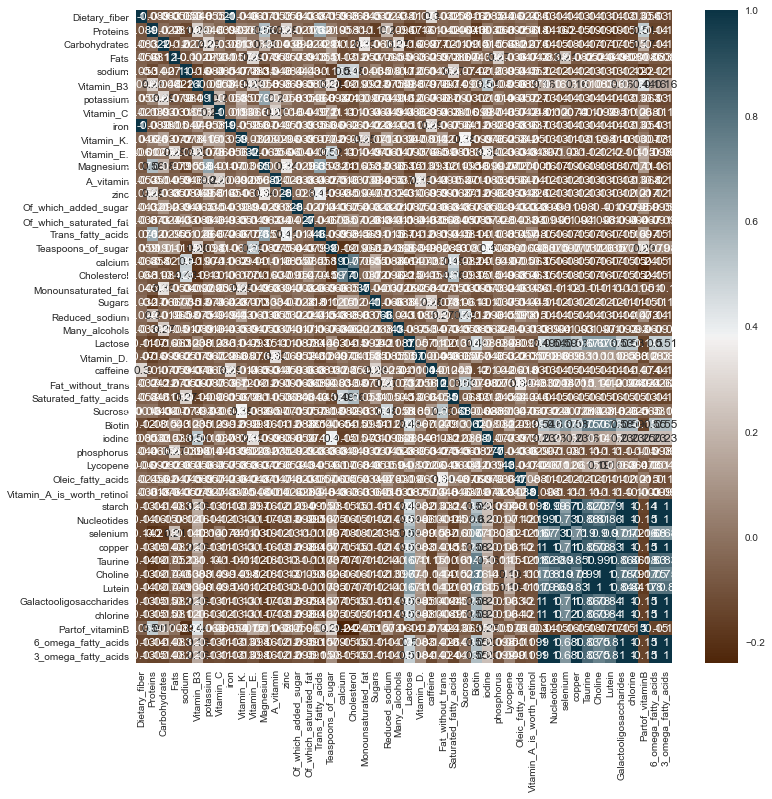

In [121]:
corr = products.corr()
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr.corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

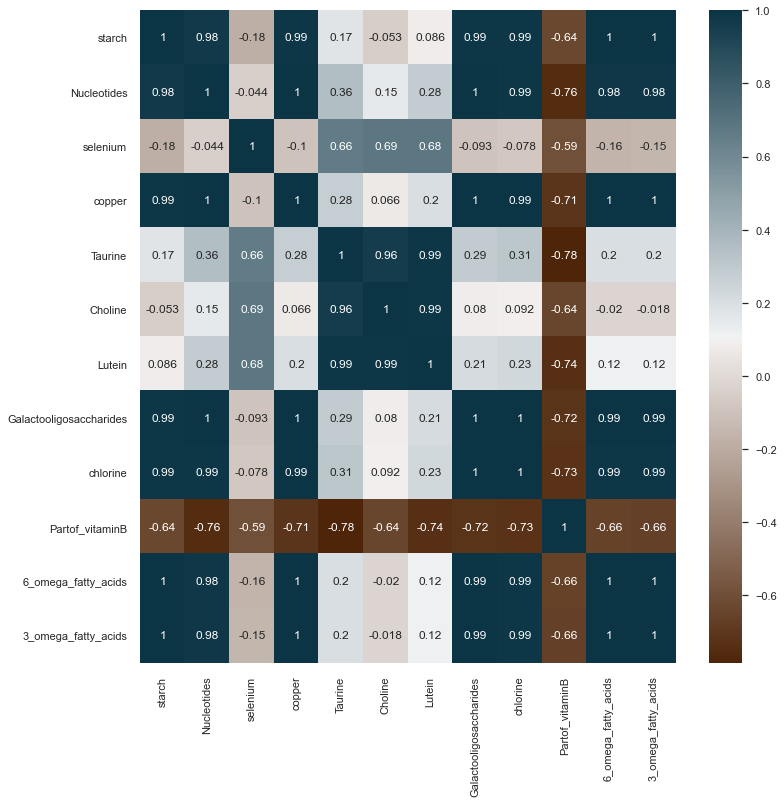

In [122]:
corr = products.loc[:,'starch':].corr()
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr.corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

בשל הקורולציות הגבוהות, החלטנו למזג את כל אלה שיש ביניהם קורולציה של כמעט 1 תחת העמודה חומצות שומן אומגה

In [123]:
products['omega_fatty_acids'] = products['3_omega_fatty_acids']
products = merge_two_columns('omega_fatty_acids', '3_omega_fatty_acids', products, 'product_name')
products = merge_two_columns('omega_fatty_acids', '6_omega_fatty_acids', products, 'product_name')
products = merge_two_columns('omega_fatty_acids', 'chlorine', products, 'product_name')
products = merge_two_columns('omega_fatty_acids', 'Galactooligosaccharides', products, 'product_name')
products = merge_two_columns('omega_fatty_acids', 'copper', products, 'product_name')
products = merge_two_columns('omega_fatty_acids', 'Nucleotides', products, 'product_name')
products = merge_two_columns('omega_fatty_acids', 'starch', products, 'product_name')
products['have_to_do_with_milk'] = products['Lutein'] #found that lutein, choline and taurine are all in babys' milk frmula - very frequent in babys food
products = merge_two_columns('have_to_do_with_milk', 'Lutein', products, 'product_name')
products = merge_two_columns('have_to_do_with_milk', 'Choline', products, 'product_name')
products = merge_two_columns('have_to_do_with_milk', 'Taurine', products, 'product_name')

In [124]:
def get_data_ready(data):
    dataw = data.drop("category_name", axis=1)
    category_not_encodedw = data["category_name"].copy()
    
    columns_need_to_drop = np.array([])
    columns_need_to_drop = np.append(columns_need_to_drop, sts_dropped_collumns)
    columns_need_to_drop = np.append(columns_need_to_drop, col_droped)
    columns_need_to_drop = set(columns_need_to_drop)
    
    dataw = dataw.drop(columns_need_to_drop, axis=1)
        
    for col in dataw.columns:  
        dataw[col] = pd.to_numeric(dataw[col], errors='coerce')
    dataw = dataw.fillna(0)
    
    category_not_encodedw = category_not_encodedw.replace(Dict)
    
    rows_to_dropw = np.array([])
    row = 0
    for cat in category_not_encodedw:
        if (cat=='Clearance_of_inventory') or (cat=='House_cleaning_and_one-time'):
            rows_to_dropw = np.append(rows_to_dropw, row)
        row=row+1    
    category_not_encodedw = category_not_encodedw.reset_index()
    category_not_encodedw = category_not_encodedw.drop(int(rows_to_dropw), axis=0)
    category_not_encodedw = category_not_encodedw.set_index('product_name', drop=True)
    
    category_encoded1w = ordinal_encoder.transform(category_not_encodedw)
    categoriesw = ordinal_encoder.categories_
    categoryarrw = enc.transform(category_not_encodedw)
    categoryarr1w = categoryarrw.toarray()
    categoryw = pd.DataFrame(categoryarr1w, columns = categoriesw[0], index=category_not_encodedw.index)
    
    dataw = dataw.reset_index()
    dataw = dataw.drop(rows_to_dropw, axis=0)
    dataw = dataw.set_index('product_name', drop=True)
    
    dataw = merge_two_columns('Vitamin_A', 'Vitamin_A_is_worth_retinol', dataw, 'product_name')
    dataw = merge_two_columns('Dietary_fiber', 'Dietary_fiber.1', dataw, 'product_name')
    dataw = merge_two_columns('potassium', 'K_Potassium', dataw, 'product_name')
    dataw = merge_two_columns('Vitamin_E.', 'Vitamin_E_equals_alpha_tocopherol', dataw, 'product_name')
    dataw = merge_two_columns('Vitamin_D.', 'Vitamin_D_Calciprolol', dataw, 'product_name')
    dataw = merge_two_columns('Vitamin_B3', 'Niacin', dataw, 'product_name')
    dataw = merge_two_columns('Vitamin_B3', 'Vitamin_B3_Nicotinamide_Equilibrium', dataw, 'product_name')
    dataw = merge_two_columns('Vitamin_B3', 'Nicotinamide', dataw, 'product_name')
    dataw = merge_two_columns('sodium', 'chloride', dataw, 'product_name')
    dataw['Partof_vitaminB'] = dataw['Vitamin_B6']
    dataw = dataw.drop(['Vitamin_B6','Vitamin_B1','Vitamin_B2','Vitamin_B12','Folic_acid'], axis=1)
    dataw = dataw.drop(['Carbohydrate_sugars'], axis=1)
    dataw = dataw.drop(['energy'], axis=1)
    dataw['6_omega_fatty_acids'] = dataw['ARA_fatty_acid']
    dataw = merge_two_columns('6_omega_fatty_acids', 'ARA_fatty_acid', dataw, 'product_name')
    dataw = merge_two_columns('6_omega_fatty_acids', 'Linoleic_fatty_acid.1', dataw, 'product_name')
    dataw = merge_two_columns('6_omega_fatty_acids', 'Linoleic_fatty_acid', dataw, 'product_name')
    dataw['3_omega_fatty_acids'] = dataw['DHA_fatty_acid']
    dataw = merge_two_columns('3_omega_fatty_acids', 'DHA_fatty_acid', dataw, 'product_name')
    dataw = merge_two_columns('3_omega_fatty_acids', 'Alpha_linolenic_acid', dataw, 'product_name')
    
    dataw['omega_fatty_acids'] = dataw['3_omega_fatty_acids']
    dataw = merge_two_columns('omega_fatty_acids', '3_omega_fatty_acids', dataw, 'product_name')
    dataw = merge_two_columns('omega_fatty_acids', '6_omega_fatty_acids', dataw, 'product_name')
    dataw = merge_two_columns('omega_fatty_acids', 'chlorine', dataw, 'product_name')
    dataw = merge_two_columns('omega_fatty_acids', 'Galactooligosaccharides', dataw, 'product_name')
    dataw = merge_two_columns('omega_fatty_acids', 'copper', dataw, 'product_name')
    dataw = merge_two_columns('omega_fatty_acids', 'Nucleotides', dataw, 'product_name')
    dataw = merge_two_columns('omega_fatty_acids', 'starch', dataw, 'product_name')
    dataw['have_to_do_with_milk'] = dataw['Lutein'] 
    dataw = merge_two_columns('have_to_do_with_milk', 'Lutein', dataw, 'product_name')
    dataw = merge_two_columns('have_to_do_with_milk', 'Choline', dataw, 'product_name')
    dataw = merge_two_columns('have_to_do_with_milk', 'Taurine', dataw, 'product_name')
    
    return dataw, categoryw, category_not_encodedw

In [125]:
test_products, test_categories, test_categories_encoded = get_data_ready(test_set)

In [130]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(products, category)
y_predict = dummy_clf.predict(test_products)
dummy_score = dummy_clf.score(y_predict, test_categories)
print(dummy_score)

0.0


Text(0, 0.5, 'Testing Accuracy')

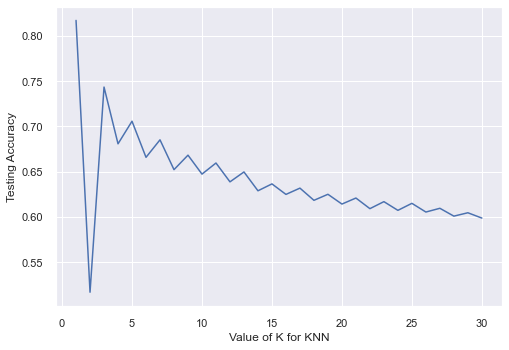

In [25]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(products, category)
    cat_pred = knn.predict(products)
    scores.append(metrics.accuracy_score(category, cat_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [26]:
max_score = max(scores)
best_K = scores.index(max(scores))+1

print("the first k value with best score is " + str(best_K) + " with accuracy of " + str(max_score))

the first k value with best score is 1 with accuracy of 0.8172717565403097


In [27]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

k_range = list(range(1, 31))
k_mean_scores = []
k_std_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, products, category, cv=kf, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())

d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
Ks = pd.DataFrame(data = d, index=k_range)

In [28]:
Ks['k_mean'].sort_values(ascending=False).head(10)

1     0.687657
3     0.675116
5     0.630285
7     0.610796
9     0.575017
21    0.570060
13    0.567010
6     0.564872
11    0.560466
15    0.560070
Name: k_mean, dtype: float64

In [29]:
Ks['k_std'].sort_values(ascending=True).head(10)

3     0.024976
1     0.054880
7     0.055557
5     0.056658
2     0.063692
4     0.073082
6     0.081261
21    0.081891
23    0.081899
8     0.082152
Name: k_std, dtype: float64

we can see that k=3 has the best mean score (1 doesn't count), and has the second best (second smallest) std. Moreover, 3 is an odd number and therefor it's great for our needs.

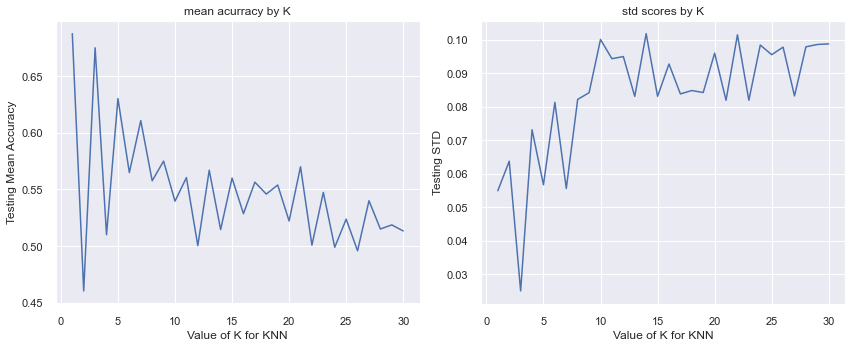

best mean acuarracy is: 0.6876567868268804
the best K's are:
Empty DataFrame
Columns: [k_mean, k_std]
Index: []
in this case I will choose the smallest k between those K's for the model, to make it the as simple as we can.


In [30]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
((ax1, ax2)) = ax

ax1.plot(k_range, k_mean_scores)
ax1.set_title('mean acurracy by K')
ax1.set_xlabel('Value of K for KNN')
ax1.set_ylabel('Testing Mean Accuracy')

ax2.plot(k_range, k_std_scores)
ax2.set_title('std scores by K')
ax2.set_xlabel('Value of K for KNN')
ax2.set_ylabel('Testing STD')

plt.tight_layout()
plt.show()

max_score = max(k_mean_scores)
min_std = min(k_std_scores)
best_Ks = Ks[(Ks['k_mean']==max_score) & (Ks['k_std']==min_std)]
print("best mean acuarracy is: " +str(max_score))
print("the best K's are:")
print(best_Ks)
print("in this case I will choose the smallest k between those K's for the model, to make it the as simple as we can.")

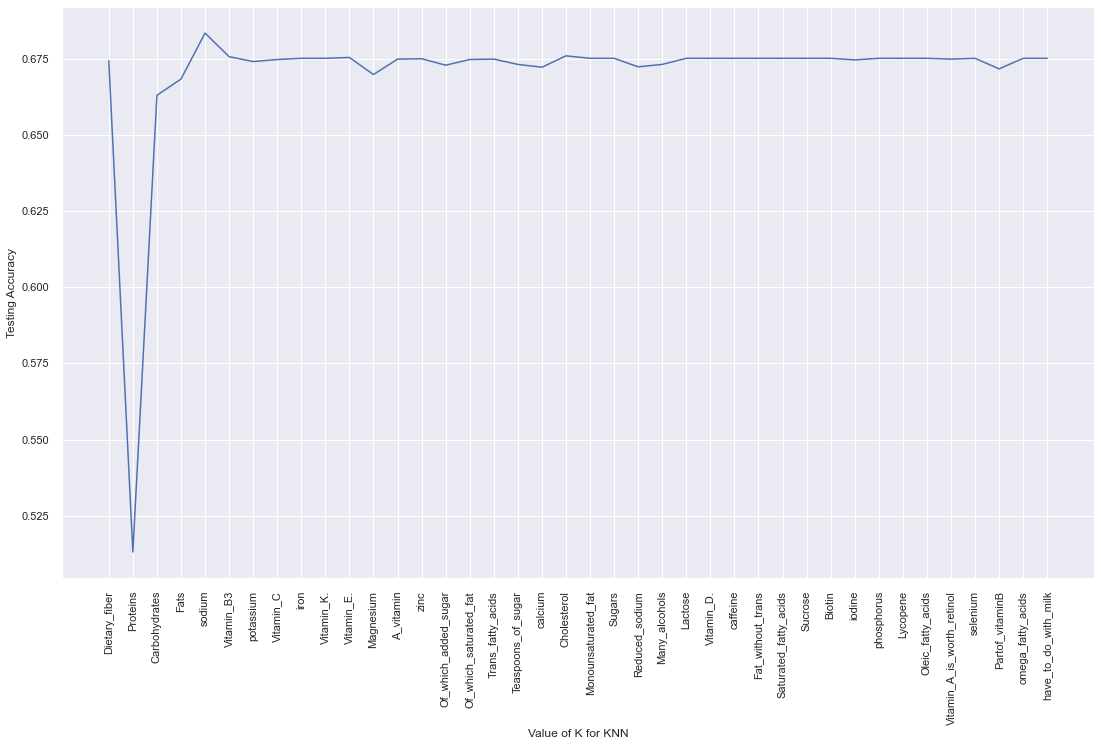

In [31]:
k_range = list(range(1, 31))
k_mean_scores = []
k_std_scores = []

features = list(products.columns.values)
for feature in features:
    knn = KNeighborsClassifier(n_neighbors= 3)
    scores = cross_val_score(knn, products.drop(columns=feature), category, cv=kf, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())
# check if there is an feature worthe to remove
fig = plt.gcf()
plt.plot(features, k_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(rotation='vertical')

fig.set_size_inches(18.5, 10.5)

By the accuracy of each feature in the graph above, we decided to drop the Proteins column

In [32]:
knn=KNeighborsClassifier()
k_range = list(range(2,31))
weight_options = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics_options)
grid=GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy')
grid.fit(products, category)
print(grid.best_score_)
print(grid.best_params_)

0.706216466399644
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [33]:
our_best_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_for = RandomForestClassifier()
randomfor_score = cross_val_score(random_for, products, category, cv=kf, scoring='accuracy').mean()
print(randomfor_score)

0.7099546061415221


In [35]:
'''from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('knn', our_best_knn), ('rf', random_for)], voting='hard')
voting_clf.fit(products, category_encoded1.ravel())
from sklearn.metrics import accuracy_score
for clf in (voting_clf, our_best_knn, random_for):
    if clf == voting_clf:
        clf.fit(products, category_encoded1.ravel())
        y_pred = clf.predict(products)
        print(clf.__class__.__name__, accuracy_score(category_encoded1, y_pred))
    else:
        clf.fit(products, category)
        y_pred = clf.predict(products)
        print(clf.__class__.__name__, accuracy_score(category, y_pred))'''

VotingClassifier 0.8175387079551522
KNeighborsClassifier 0.8100640683395622
RandomForestClassifier 0.8148691938067272


In [135]:
random_for = RandomForestClassifier()
random_for.fit(products, category)
final_predict = random_for.predict(test_products)
print('Funal accuracy score of model is: ', accuracy_score(final_predict, test_categories))

voting_clf:  0.7108559498956158


In [136]:
voting_clf.fit(products, category_encoded1.ravel())
final_predict = voting_clf.predict(test_products)
print('voting_clf: ', accuracy_score(final_predict, test_categories_encoded))

voting_clf:  0.0
